In [56]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


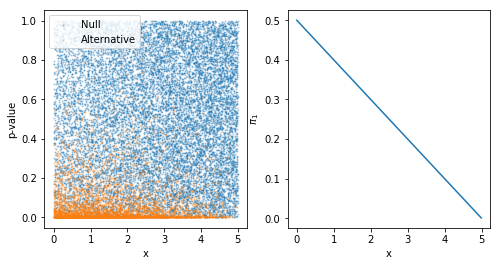

In [71]:
#generate 1d data and plot
plt.figure(figsize = (8,4))
plt.subplot(121)
X = np.random.uniform(high = 5, size = (20000,))
pi1 = (5-X) / 10.0
p, h, x = generate_data_1D_cont(pi1, X)
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3, label = 'Null')
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3, label = 'Alternative')
plt.legend()
plt.xlabel('x')
plt.ylabel('p-value')
plt.subplot(122)
x2 = np.arange(0,5,0.01)
y2 = (5-x2) / 10.0
plt.plot(x2,y2)
plt.xlabel('x')
plt.ylabel('$\pi_1$')
plt.savefig('1d1.png')

In [72]:
network = get_network().cuda()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [73]:
print(BH(p))
print(Storey_BH(p))
p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, cuda = True, num_it = 2000)

(1687, 0.0042043219955338962)
(1939, 0.0063173166693343275, 0.76600000000000001)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


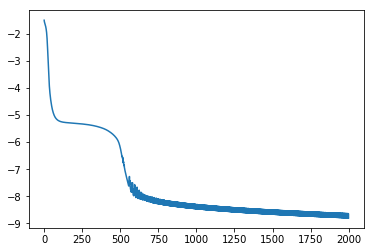

In [74]:
plt.plot(np.log(loss_hist))

In [75]:
#optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, val_hist, s, s2 = train_network_val(network, optimizer, x, p, num_it = 2000, cuda = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


(Variable containing:
 0.1099
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-03 *
  6.8421
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
1.00000e-02 *
  6.2232
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)


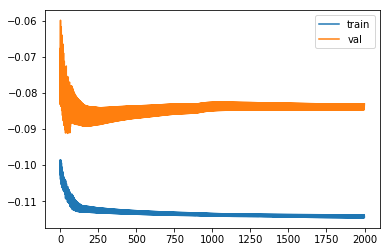

In [76]:
plt.plot(loss_hist, label = 'train')
plt.plot(val_hist, label = 'val')
plt.legend()
print(s,s2, s2/s)

In [77]:
network.cpu()

Model (
  (layers): Sequential (
    (0): Linear (1 -> 10)
    (1): LeakyReLU (0.1)
    (2): Linear (10 -> 10)
    (3): LeakyReLU (0.1)
    (4): Linear (10 -> 10)
    (5): LeakyReLU (0.1)
    (6): Linear (10 -> 10)
    (7): LeakyReLU (0.1)
    (8): Linear (10 -> 10)
    (9): LeakyReLU (0.1)
    (10): Linear (10 -> 10)
    (11): LeakyReLU (0.1)
    (12): Linear (10 -> 1)
    (13): Sigmoid ()
  )
)

In [78]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

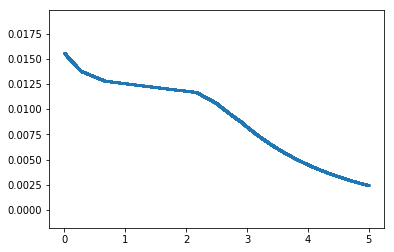

In [79]:
plt.scatter(x, output.data.numpy(), 2)

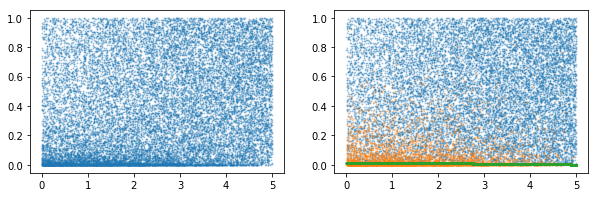

In [80]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.scatter(x, p, 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.subplot(1,2,2)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
plt.scatter(x, output.data.numpy(), 1)

In [81]:
sum(pred)

2256.0

In [82]:
x2 = np.arange(0, 5, 0.01)
n_samples = len(x2)
x_input = Variable(torch.from_numpy(x2.astype(np.float32).reshape(n_samples ,1)))
output2 = network.forward(x_input)


In [83]:
network.cpu()

Model (
  (layers): Sequential (
    (0): Linear (1 -> 10)
    (1): LeakyReLU (0.1)
    (2): Linear (10 -> 10)
    (3): LeakyReLU (0.1)
    (4): Linear (10 -> 10)
    (5): LeakyReLU (0.1)
    (6): Linear (10 -> 10)
    (7): LeakyReLU (0.1)
    (8): Linear (10 -> 10)
    (9): LeakyReLU (0.1)
    (10): Linear (10 -> 10)
    (11): LeakyReLU (0.1)
    (12): Linear (10 -> 1)
    (13): Sigmoid ()
  )
)

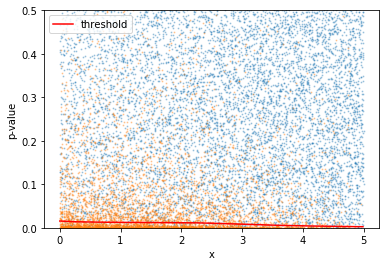

In [84]:
plt.figure()
plt.scatter(x[h==0], p[h==0], 1, alpha = 0.3)
plt.scatter(x[h==1], p[h==1], 1, alpha = 0.3)
plt.plot(x2, output2.data.numpy(), 'r', label = 'threshold')
plt.ylim(0,0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('p-value')
plt.savefig('1d2.png')

In [85]:
with open('data2.csv', 'w') as f:
    f.write('x_value, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}\n".format(x[i],p[i], h[i]))